##  Coffee Sales Data Analysis

In [27]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [3]:
# Load Dataset

df = pd.read_csv('/content/coffee_data.csv')
print("Data Loaded Successfully")

Data Loaded Successfully


In [4]:
# Display first few rows

print(" First 5 records:")
print(df.head())

 First 5 records:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [5]:
#  Check for missing values

print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [6]:
# Convert datetime to datetime object

df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
#  Feature Engineering - Extracting time-based fields

df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['weekday'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month_name()

In [9]:
#  Summary Statistics

print("\n Summary Statistics:")
print(df.describe(include='all'))



 Summary Statistics:
              date                       datetime cash_type  \
count         1133                           1133      1133   
unique         150                            NaN         2   
top     2024-07-30                            NaN      card   
freq            24                            NaN      1044   
mean           NaN  2024-05-20 02:38:39.053382912       NaN   
min            NaN     2024-03-01 10:15:50.520000       NaN   
25%            NaN  2024-04-14 10:55:27.406000128       NaN   
50%            NaN  2024-05-23 12:22:06.604999936       NaN   
75%            NaN  2024-06-22 08:39:50.272999936       NaN   
max            NaN     2024-07-31 21:55:16.570000       NaN   
std            NaN                            NaN       NaN   

                       card        money          coffee_name         hour  \
count                  1044  1133.000000                 1133  1133.000000   
unique                  446          NaN                    8    

<ipython-input-10-3ded61071bc9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index, palette='muted')


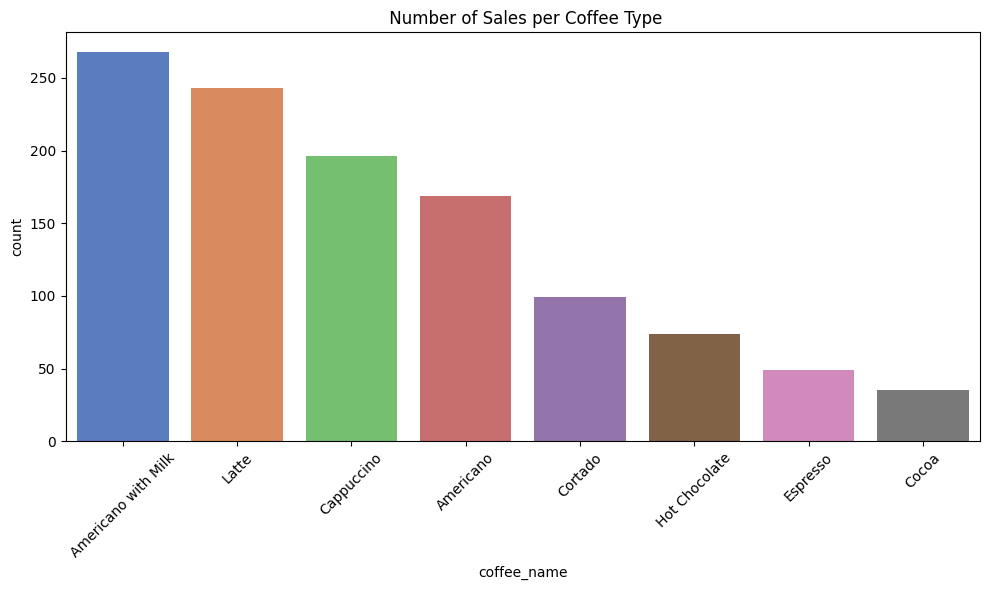

In [10]:
# Coffee Sales Count

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index, palette='muted')
plt.title(' Number of Sales per Coffee Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


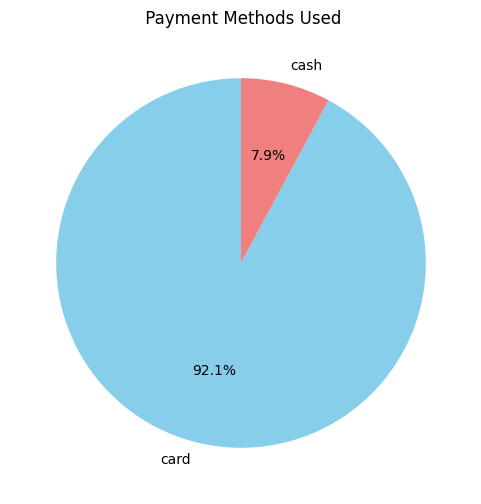

In [12]:
# Payment Method Distribution

plt.figure(figsize=(6,6))
df['cash_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title(' Payment Methods Used')
plt.ylabel('')
plt.show()

<ipython-input-14-b29a490c2a6a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hour', palette='mako')


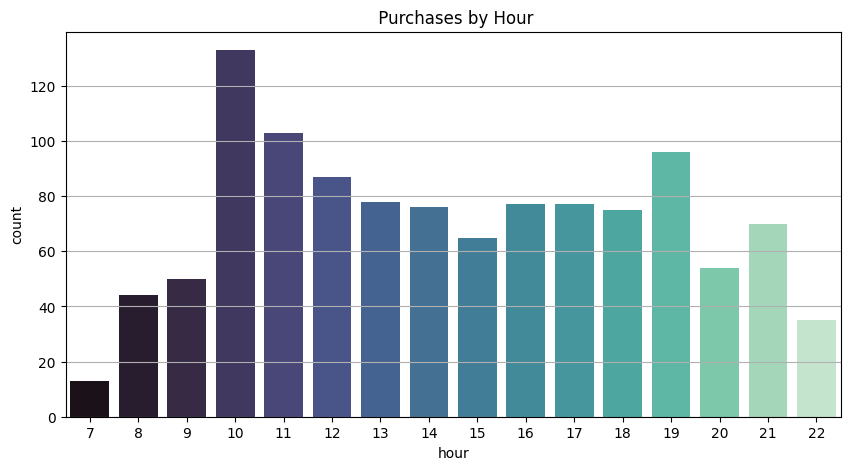

In [14]:
# Hourly Sales Trend

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='hour', palette='mako')
plt.title(' Purchases by Hour')
plt.grid(True, axis='y')
plt.show()

<ipython-input-16-cb395953ceb7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='viridis')


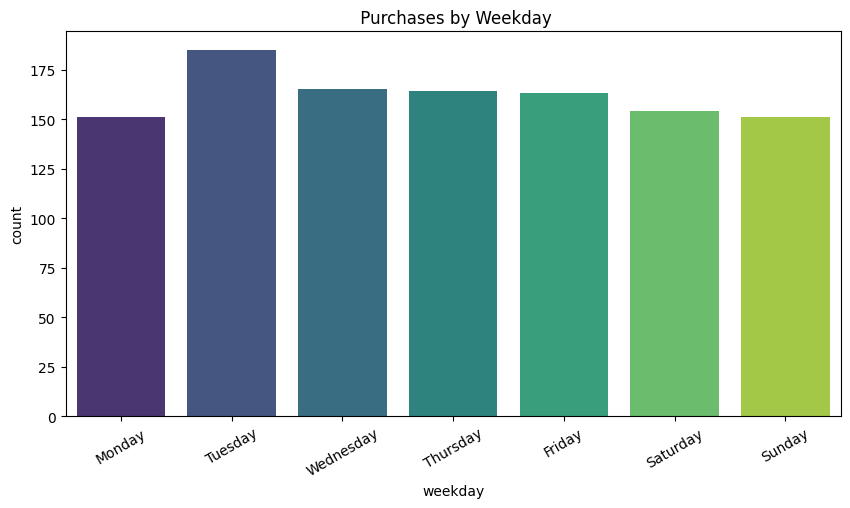

In [16]:
# Weekly Sales Trend

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='viridis')
plt.title(' Purchases by Weekday')
plt.xticks(rotation=30)
plt.show()


<ipython-input-17-2392422d07a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue.index, y=revenue.values, palette='cubehelix')


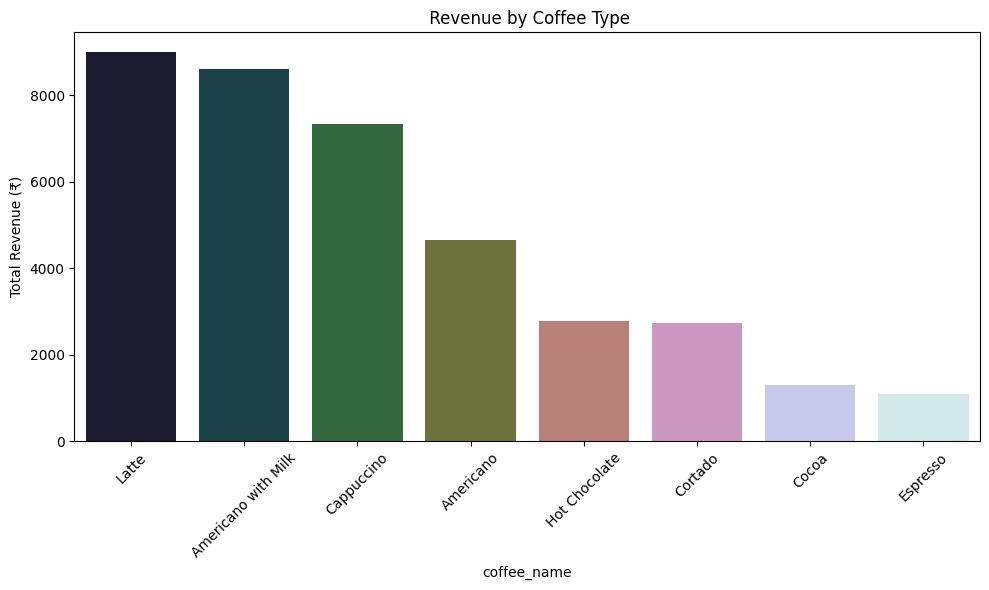

In [17]:
# 5. Revenue per Coffee Type

plt.figure(figsize=(10,6))
revenue = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
sns.barplot(x=revenue.index, y=revenue.values, palette='cubehelix')
plt.title(' Revenue by Coffee Type')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-18-a5bfcd24c5e6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month', order=df['month'].value_counts().index, palette='coolwarm')


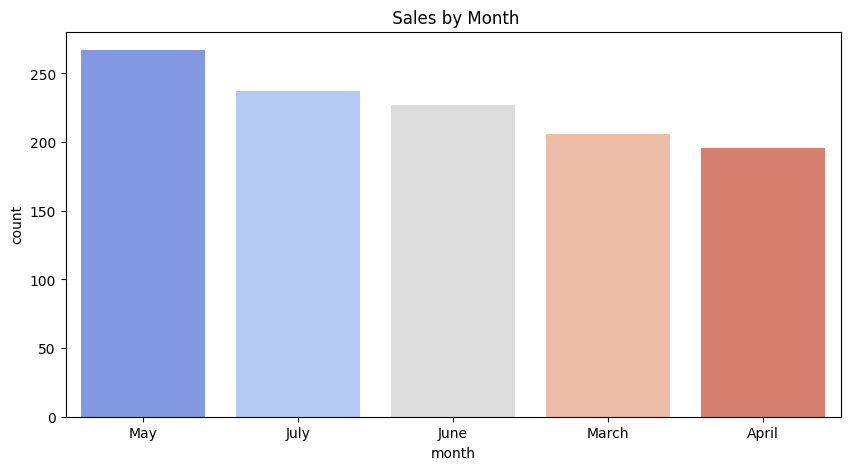

In [18]:
# 6. Monthly Sales Distribution

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='month', order=df['month'].value_counts().index, palette='coolwarm')
plt.title(' Sales by Month')
plt.show()

In [19]:
# Create a pivot table: customers vs coffee types

customer_matrix = df.pivot_table(index='card', columns='coffee_name', values='money', aggfunc='count').fillna(0)

In [20]:
# Top 5 customers by total spend

top_customers = df.groupby('card')['money'].sum().sort_values(ascending=False).head(5)

In [21]:
# Create heatmap for top 5 customers

heatmap_data = customer_matrix.loc[top_customers.index]

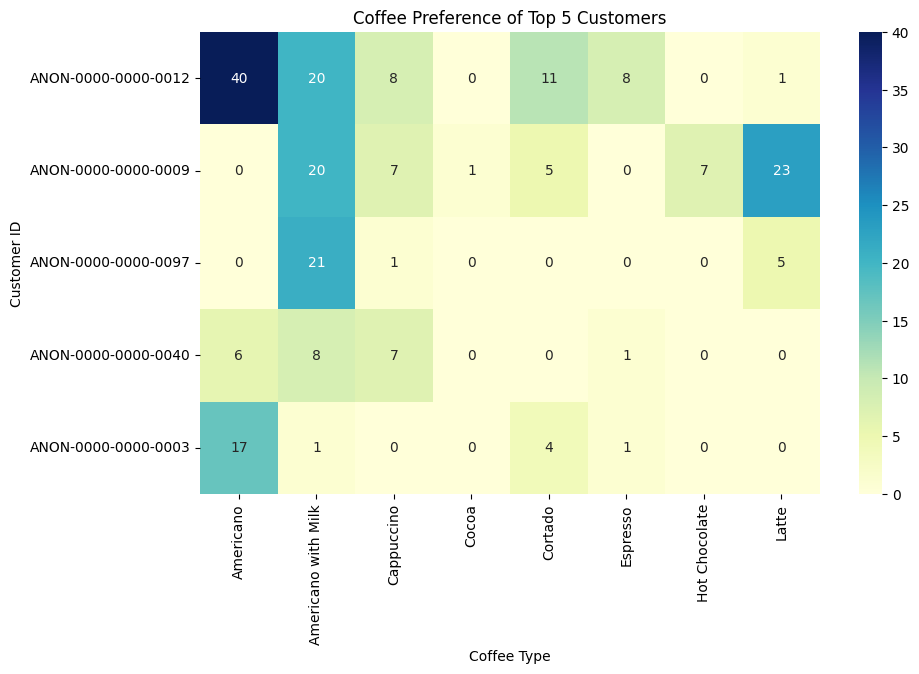

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Coffee Preference of Top 5 Customers')
plt.ylabel('Customer ID')
plt.xlabel('Coffee Type')
plt.show()

In [23]:
# Repeat purchase analysis

purchase_counts = df.groupby('card').size()
repeat_dist = purchase_counts.value_counts().sort_index()

<ipython-input-25-5992e5ca47ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=repeat_dist.index, y=repeat_dist.values, palette='crest')


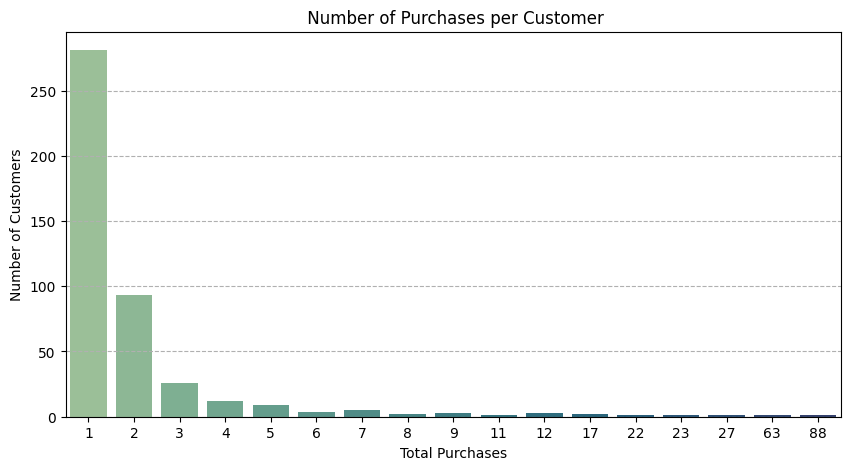

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x=repeat_dist.index, y=repeat_dist.values, palette='crest')
plt.title(' Number of Purchases per Customer')
plt.xlabel('Total Purchases')
plt.ylabel('Number of Customers')
plt.grid(True, axis='y', linestyle='--')
plt.show()

In [26]:
# Print top 5 loyal customers

print(" Top 5 Customers by Spend:")
print(top_customers)

 Top 5 Customers by Spend:
card
ANON-0000-0000-0012    2593.18
ANON-0000-0000-0009    2212.70
ANON-0000-0000-0097     882.22
ANON-0000-0000-0040     706.36
ANON-0000-0000-0003     651.96
Name: money, dtype: float64


### RFM Analysis

In [28]:
# Calculate Recency (days since last purchase)

latest_date = df['datetime'].max()
rfm = df.groupby('card').agg({
    'datetime': lambda x: (latest_date - x.max()).days,
    'card': 'count',
    'money': 'sum'
}).rename(columns={'datetime': 'Recency', 'card': 'Frequency', 'money': 'Monetary'})

### KMeans Clustering

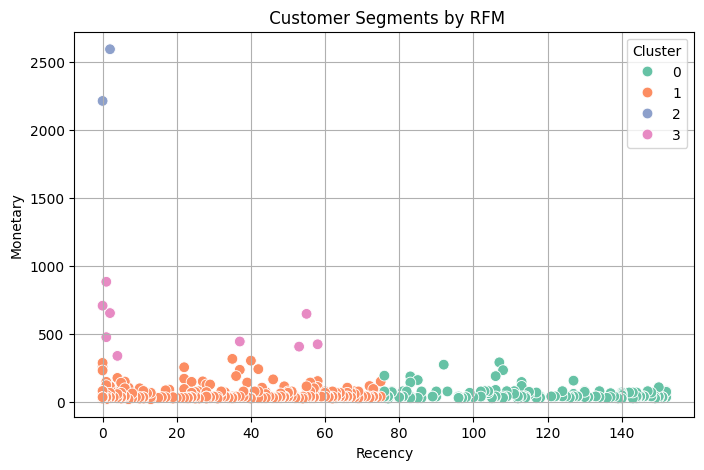

In [30]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Plot clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2', s=60)
plt.title(' Customer Segments by RFM')
plt.grid(True)
plt.show()

### Time Series Forecasting (Moving Average)

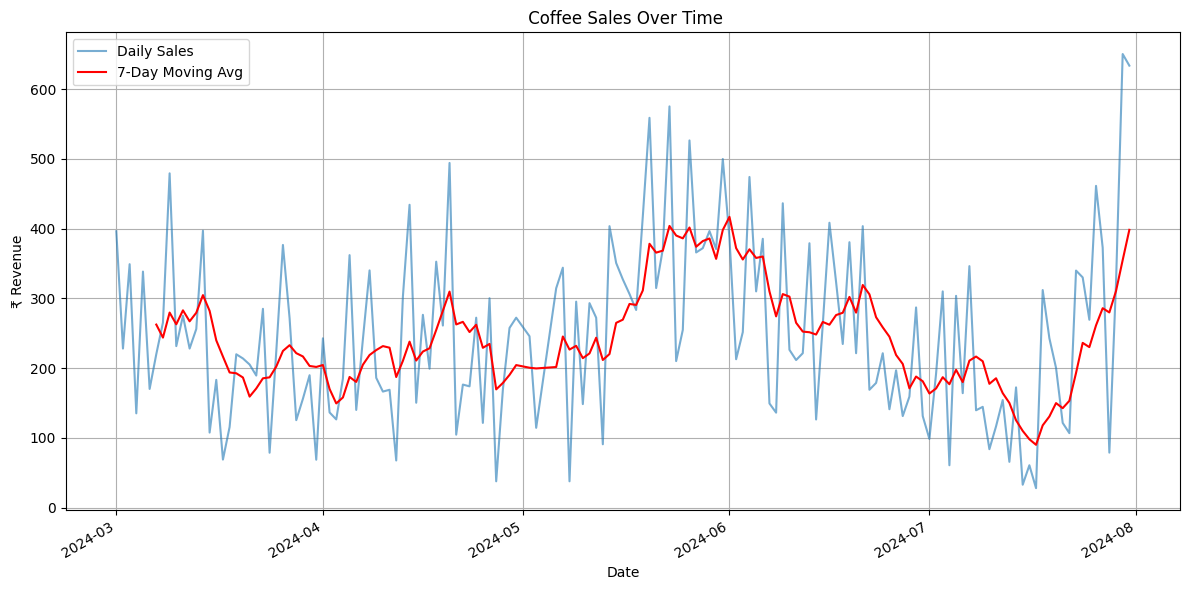

In [31]:
df['date'] = pd.to_datetime(df['date'])
daily_sales = df.groupby('date')['money'].sum()

plt.figure(figsize=(12,6))
daily_sales.plot(label='Daily Sales', alpha=0.6)
daily_sales.rolling(7).mean().plot(label='7-Day Moving Avg', color='red')
plt.title(' Coffee Sales Over Time')
plt.ylabel('₹ Revenue')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()